In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
MatchVotesInfo = pd.read_csv('csv/MatchVotesInfo.csv')
MatchTournamentInfo = pd.read_csv('csv/MatchTournamentInfo.csv')
MatchSeasonInfo = pd.read_csv('csv/MatchSeasonInfo.csv')
MatchRoundInfo = pd.read_csv('csv/MatchRoundInfo.csv')
MatchVenueInfo = pd.read_csv('csv/MatchVenueInfo.csv')
MatchHomeTeamInfo = pd.read_csv('csv/MatchHomeTeamInfo.csv')
MatchAwayTeamInfo = pd.read_csv('csv/MatchAwayTeamInfo.csv')
MatchHomeScoreInfo = pd.read_csv('csv/MatchHomeScoreInfo.csv')
MatchAwayScoreInfo = pd.read_csv('csv/MatchAwayScoreInfo.csv')
MatchTimeInfo = pd.read_csv('csv/MatchTimeInfo.csv')
GameInfo = pd.read_csv('csv/GameInfo.csv')
OddsInfo = pd.read_csv('csv/OddsInfo.csv')
PowerInfo = pd.read_csv('csv/PowerInfo.csv')
PeriodInfo = pd.read_csv('csv/PeriodInfo.csv')
MatchEventInfo = pd.read_csv('csv/MatchEventInfo.csv')

1. How many tennis players are included in the dataset?

In [8]:
combined_players = pd.concat([MatchHomeTeamInfo['player_id'], MatchAwayTeamInfo['player_id']])  
unique_players_count = combined_players.nunique()  

print(f'Number of unique tennis players in the dataset: {unique_players_count}')

Number of unique tennis players in the dataset: 2352


2. What is the average age of the players?

In [9]:
current_year = 2024
MatchHomeTeamInfo['estimated_age'] = current_year - MatchHomeTeamInfo['turned_pro'] 
MatchAwayTeamInfo['estimated_age'] = current_year - MatchAwayTeamInfo['turned_pro']  
combined_ages = pd.concat([MatchHomeTeamInfo['estimated_age'], MatchAwayTeamInfo['estimated_age']])  
average_age = int(combined_ages.mean()) 

print(f'Average estimated age of the players turned pro: {average_age:.2f}')

Average estimated age of the players turned pro: 12.00


3. Which player has the highest number of wins?

In [10]:
home_wins = MatchEventInfo[MatchEventInfo['winner_code'] == 1].merge(  
    MatchHomeTeamInfo[['match_id', 'player_id', 'name']],  
    on='match_id',  
    how='left'  
)  
away_wins = MatchEventInfo[MatchEventInfo['winner_code'] == 2].merge(  
    MatchAwayTeamInfo[['match_id', 'player_id', 'name']],  
    on='match_id',  
    how='left'  
)   
all_wins = pd.concat([home_wins[['player_id', 'name']], away_wins[['player_id', 'name']]])  
win_counts = all_wins.groupby(['player_id', 'name']).size().reset_index(name='win_count')  
top_player = win_counts.loc[win_counts['win_count'].idxmax()]  

print(f"Player with most wins: {top_player['name']} (ID: {top_player['player_id']}, {top_player['win_count']} wins)")

Player with most wins: Uchijima M. (ID: 253356.0, 75 wins)


4. What is the longest match recorded in terms of duration?

In [11]:
def calculate_total_periods(row):
    return row['period_1'] + row['period_2'] + row['period_3'] + row['period_4'] + row['period_5']
MatchTimeInfo['total_periods'] = MatchTimeInfo.apply(calculate_total_periods, axis=1)
merged_info = pd.merge(MatchTimeInfo, MatchHomeScoreInfo[['match_id', 'current_score']], on='match_id')
merged_info = pd.merge(merged_info, MatchAwayScoreInfo[['match_id', 'current_score']], on='match_id', suffixes=('_home', '_away'))
longest_match = merged_info.loc[merged_info['total_periods'].idxmax()]

print("Longest Match Details:")
print(longest_match)


Longest Match Details:
match_id                          1.236620e+07
period_1                          3.912500e+04
period_2                          5.020000e+02
period_3                          6.760000e+02
period_4                          8.940000e+02
period_5                          1.354000e+03
current_period_start_timestamp    1.716842e+09
total_periods                     4.255100e+04
current_score_home                         NaN
current_score_away                         NaN
Name: 81850, dtype: float64


5. How many sets are typically played in a tennis match?

In [12]:
sets_per_match = GameInfo.groupby('match_id')['set_id'].nunique()  
average_sets = int(sets_per_match.mean())  

print(f'Average number of sets typically played in a tennis match: {average_sets:.2f}')

Average number of sets typically played in a tennis match: 2.00


6. Which country has produced the most successful tennis players?

In [ ]:
combined_players = pd.concat([  
    MatchHomeTeamInfo[['country', 'current_prize', 'total_prize', 'current_rank']],  
    MatchAwayTeamInfo[['country', 'current_prize', 'total_prize', 'current_rank']]  
])  
country_stats = combined_players.groupby('country').agg({  
    'current_prize': 'sum',        
    'total_prize': 'sum',          
    'current_rank': 'mean'       
}).reset_index()    
country_stats = country_stats.sort_values(by='total_prize', ascending=False)  
print(country_stats)  
  
top_n_countries = country_stats.head(10) 
print("\nTop 10 Countries by Total Prize Money:")  
print(top_n_countries)

          country  current_prize   total_prize  current_rank
76         Serbia     36575194.0  2.864743e+09    747.989865
89            USA    242478175.0  2.659778e+09    512.813080
29         France    107584596.0  2.070418e+09    479.878788
81          Spain     75651313.0  1.955971e+09    576.476283
74         Russia    154490400.0  1.877298e+09    608.542085
..            ...            ...           ...           ...
63        Nigeria        11715.0  8.375500e+04   1239.647059
37           Iran         9686.0  3.917000e+04   1181.230769
61  New Caledonia         8224.0  1.930300e+04   1160.571429
6      Azerbaijan         2078.0  1.191000e+04   1273.500000
48     Kyrgyzstan         3342.0  8.826000e+03   1168.000000

[97 rows x 4 columns]

Top 10 Countries by Total Prize Money:
      country  current_prize   total_prize  current_rank
76     Serbia     36575194.0  2.864743e+09    747.989865
89        USA    242478175.0  2.659778e+09    512.813080
29     France    107584596.0  2.07

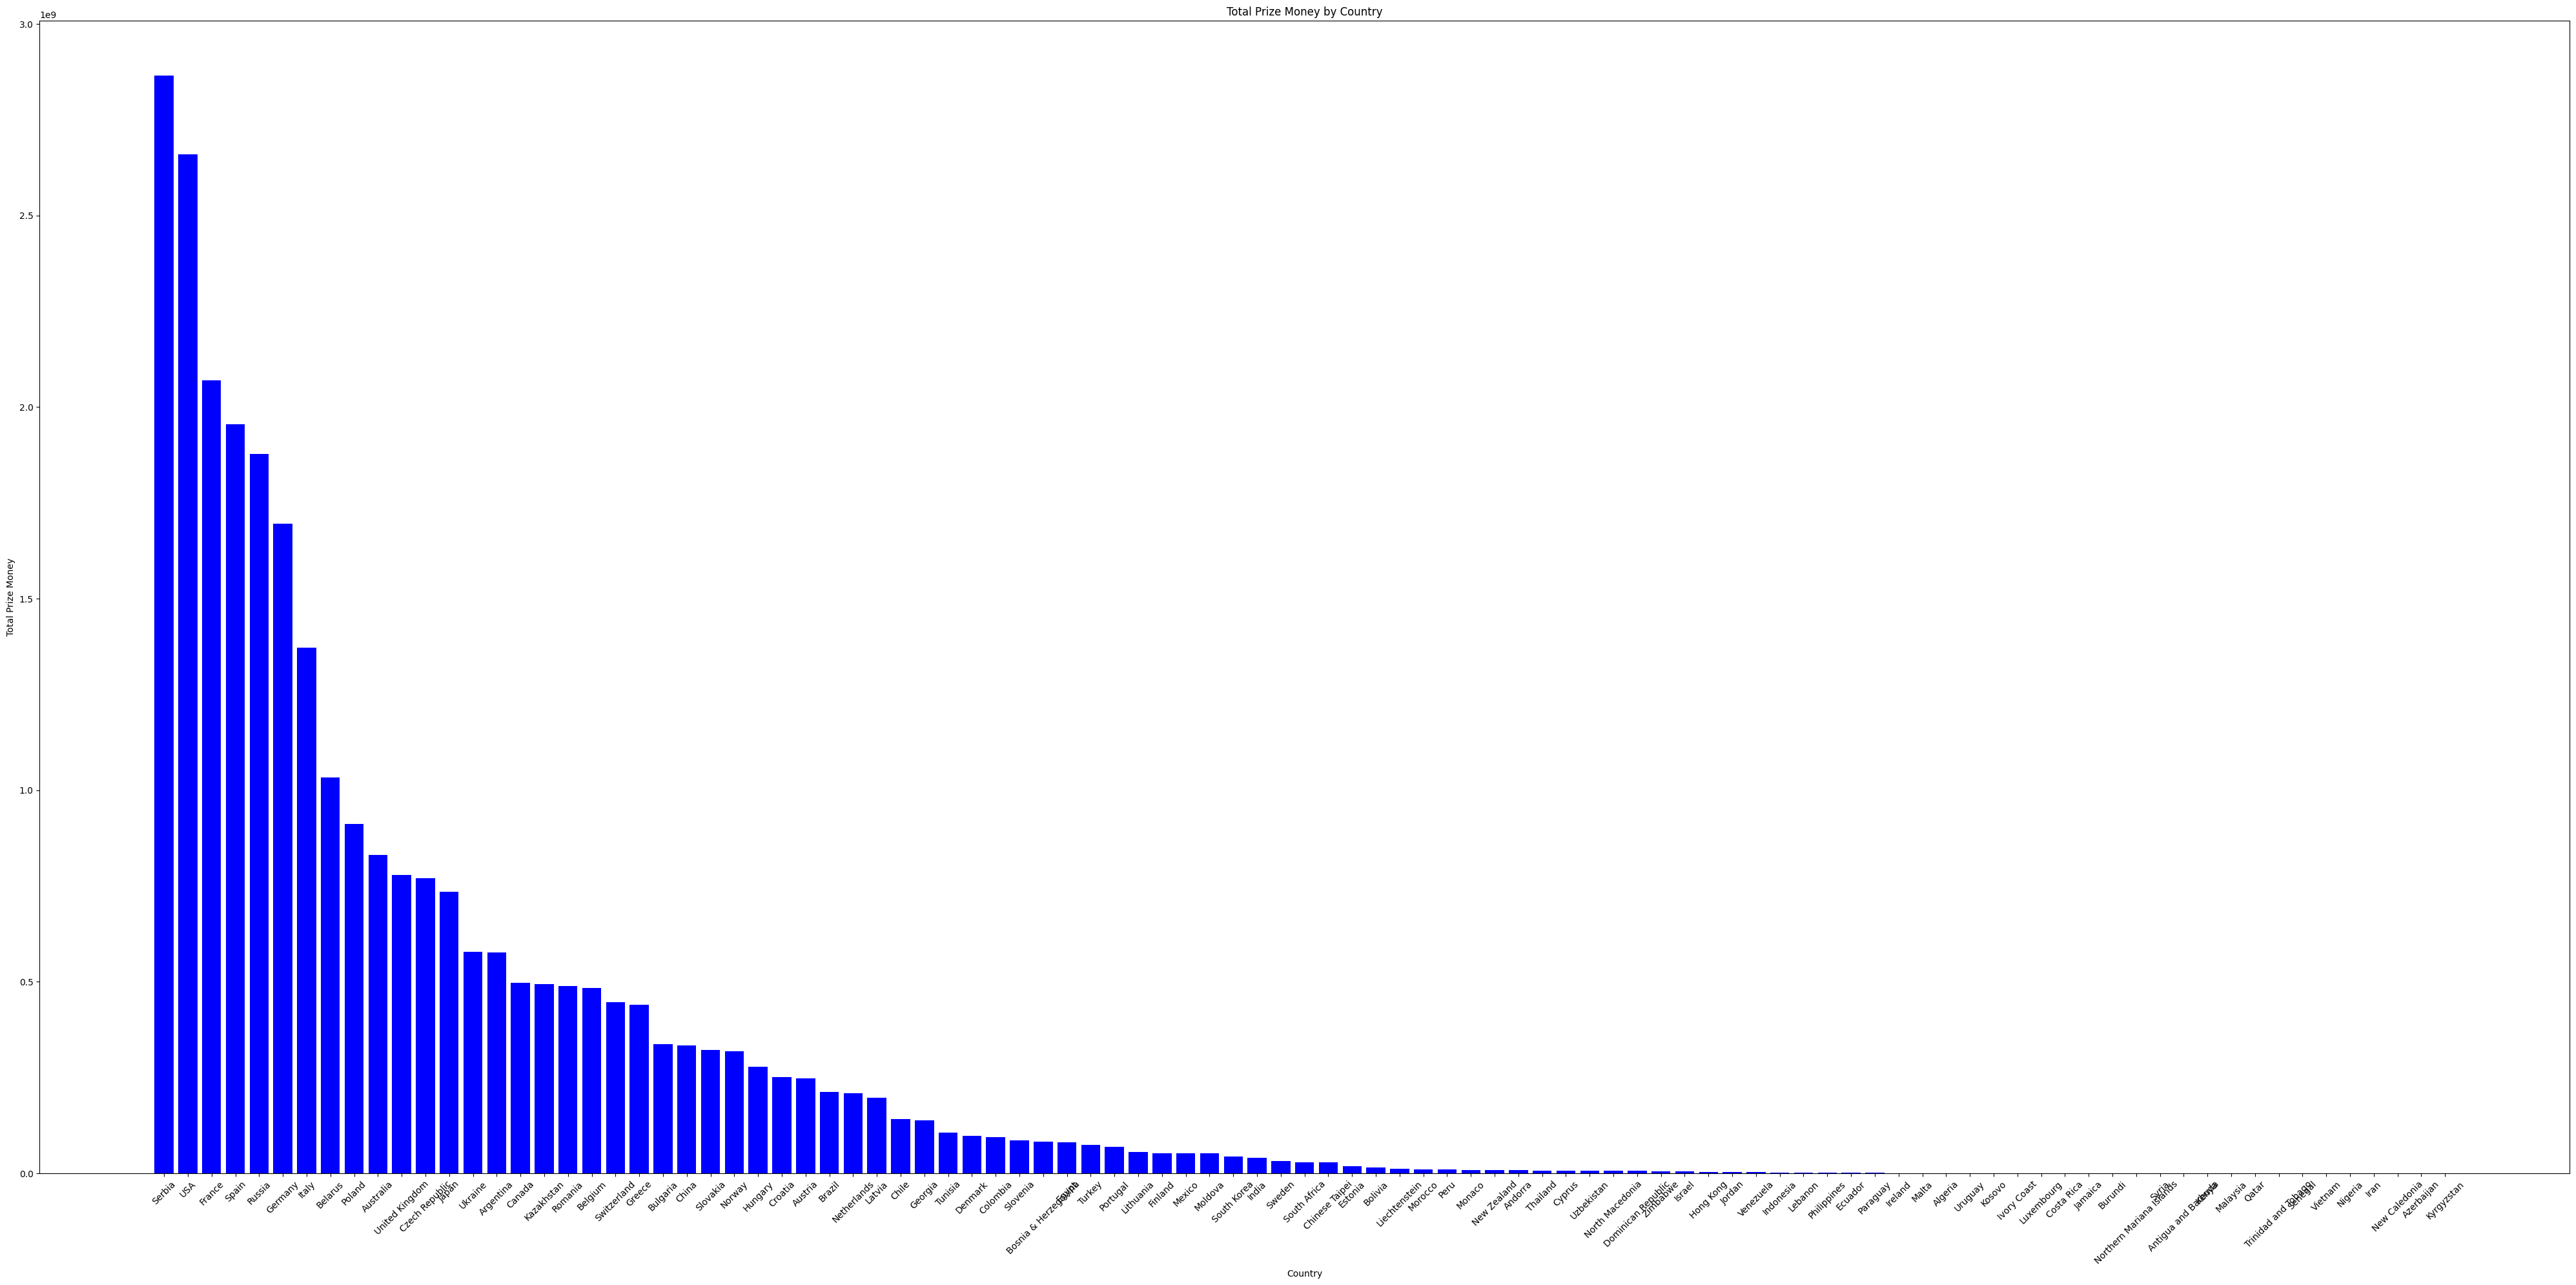

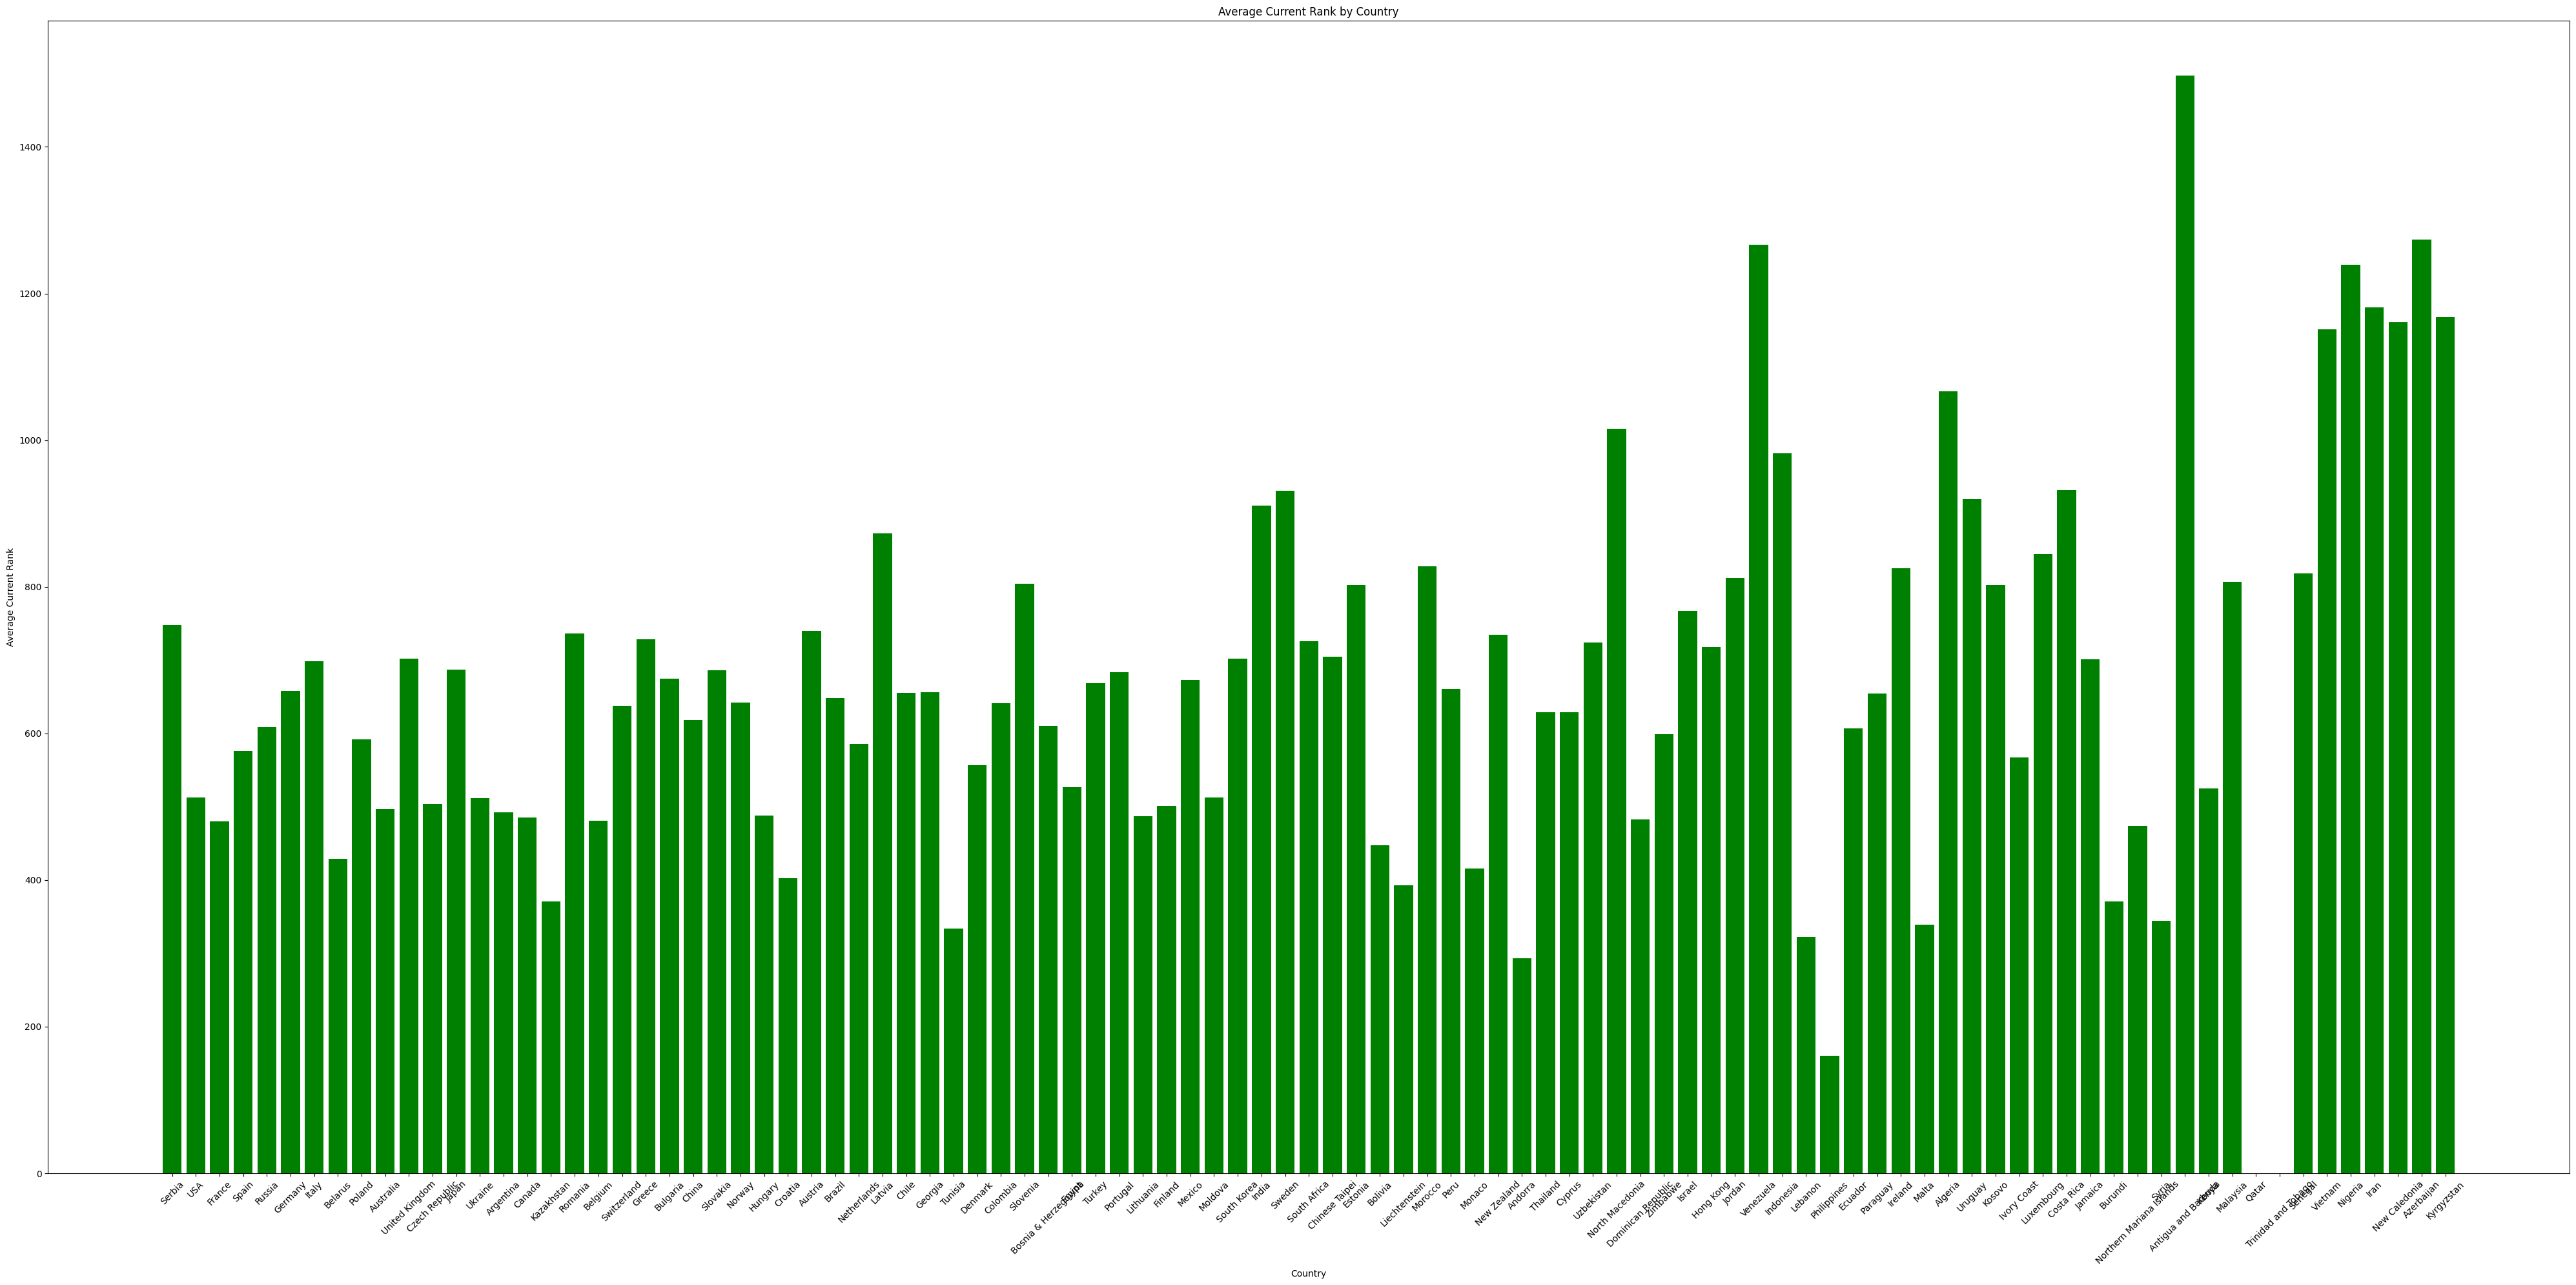

In [15]:
plt.figure(figsize=(40, 20))  
plt.bar(country_stats['country'], country_stats['total_prize'], color='blue')  
plt.title('Total Prize Money by Country')  
plt.xlabel('Country')  
plt.ylabel('Total Prize Money')  
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()  

plt.figure(figsize=(40, 20))  
plt.bar(country_stats['country'], country_stats['current_rank'], color='green')  
plt.title('Average Current Rank by Country')  
plt.xlabel('Country')  
plt.ylabel('Average Current Rank')  
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

7. What is the average number of aces per match?

In [16]:
aces_df = PeriodInfo[PeriodInfo['statistic_name'] == 'aces']   
aces_per_match = aces_df.groupby('match_id').agg({'home_value': 'sum', 'away_value': 'sum'}).reset_index()   
aces_per_match['total_aces'] = aces_per_match['home_value'] + aces_per_match['away_value']   
average_aces = int(aces_per_match['total_aces'].mean()) 

print(f"The average number of aces per match is: {average_aces:.2f}")

The average number of aces per match is: 9.00


8. Is there a difference in the number of double faults based on gender?

   gender  total_double_faults
0  Away F               111530
1  Away M                75440
2  Home F               113778
3  Home M                81174


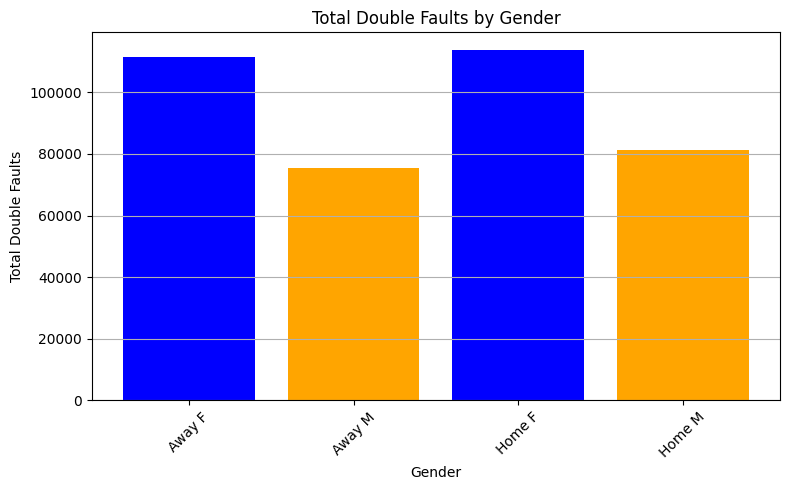

In [6]:
double_faults_df = PeriodInfo[PeriodInfo['statistic_name'] == 'double_faults']  

home_double_faults = double_faults_df.merge(MatchHomeTeamInfo[['match_id', 'gender']], on='match_id')  
home_double_faults['gender'] = 'Home ' + home_double_faults['gender']  # Label for home players  
 
away_double_faults = double_faults_df.merge(MatchAwayTeamInfo[['match_id', 'gender']], on='match_id')  
away_double_faults['gender'] = 'Away ' + away_double_faults['gender']  # Label for away players  
  
combined_double_faults = pd.concat([home_double_faults, away_double_faults])  
 
gender_double_faults = combined_double_faults.groupby('gender').agg({'home_value': 'sum', 'away_value': 'sum'}).reset_index()  
gender_double_faults['total_double_faults'] = gender_double_faults['home_value'] + gender_double_faults['away_value']  

print(gender_double_faults[['gender', 'total_double_faults']])

plt.figure(figsize=(8, 5))  
plt.bar(gender_double_faults['gender'], gender_double_faults['total_double_faults'], color=['blue', 'orange'])  
plt.title('Total Double Faults by Gender')  
plt.xlabel('Gender')  
plt.ylabel('Total Double Faults')  
plt.xticks(rotation=45)  
plt.grid(axis='y')   
plt.tight_layout()  
plt.show()

9. Which player has won the most tournaments in a single month?

In [9]:
merged_info = pd.merge(MatchEventInfo, MatchTournamentInfo, on='match_id')
merged_info = merged_info.merge(MatchHomeTeamInfo[['match_id', 'name']], on='match_id', how='left')
merged_info = merged_info.merge(MatchAwayTeamInfo[['match_id', 'name']], on='match_id', how='left', suffixes=('_home', '_away'))
merged_info['winner_name'] = merged_info.apply(
    lambda row: row['name_home'] if row['winner_code'] == 'home' else row['name_away'], axis=1
)
tournament_wins = merged_info.groupby('winner_name')['tournament_name'].nunique().reset_index(name='tournament_wins')
most_wins_player = tournament_wins.loc[tournament_wins['tournament_wins'].idxmax()]

print(f"Player with the most tournaments won: {most_wins_player}")


Player with the most tournaments won: winner_name        Aikawa M.
tournament_wins            6
Name: 16, dtype: object


10. Is there a correlation between a player's height and their ranking?


Correlation between player's height and ranking: 0.11


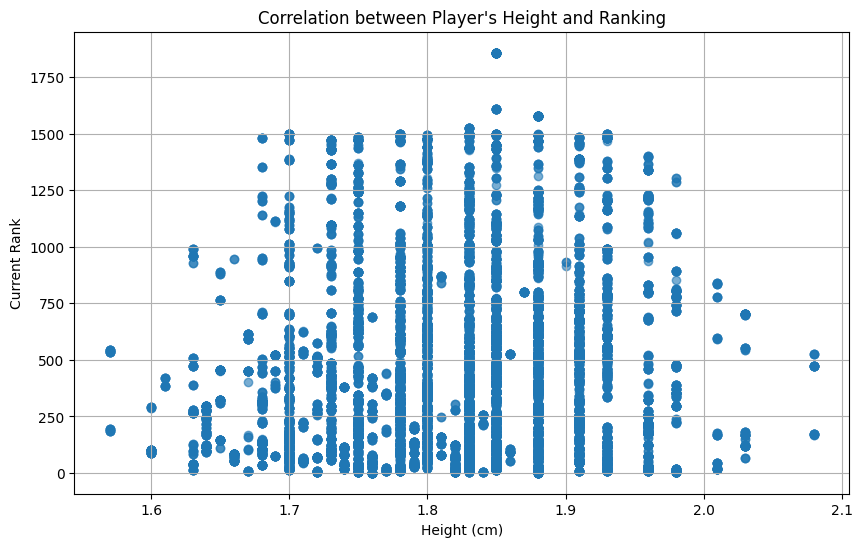

In [20]:
home_players = MatchHomeTeamInfo[['height', 'current_rank']].rename(columns={'height': 'player_height', 'current_rank': 'player_rank'})  
away_players = MatchAwayTeamInfo[['height', 'current_rank']].rename(columns={'height': 'player_height', 'current_rank': 'player_rank'})  
home_players['player_type'] = 'Home'  
away_players['player_type'] = 'Away'  
combined_players = pd.concat([home_players, away_players], ignore_index=True)  
combined_players.dropna(inplace=True)  

correlation = combined_players['player_height'].corr(combined_players['player_rank'])  
print(f"Correlation between player's height and ranking: {correlation:.2f}")  
  
plt.figure(figsize=(10, 6))  
plt.scatter(combined_players['player_height'], combined_players['player_rank'], alpha=0.6)  
plt.title("Correlation between Player's Height and Ranking")  
plt.xlabel("Height (cm)")  
plt.ylabel("Current Rank")  
plt.grid()  
plt.show()

11.What is the average duration of matches?

In [21]:
MatchTimeInfo['current_period_start_timestamp'] = pd.to_datetime(MatchTimeInfo['current_period_start_timestamp'])   
MatchTimeInfo['total_duration'] = MatchTimeInfo[['period_1', 'period_2', 'period_3']].sum(axis=1)  
average_duration_hours = MatchTimeInfo['total_duration'].mean() / 3600  # Convert to hours  

print(f"The average duration of matches is {average_duration_hours:.2f} hours.")  

The average duration of matches is 1.40 hours.


12.What is the average number of games per set in men's matches compared to women's matches?

C:\Users\Nima\AppData\Local\Temp\ipykernel_5680\1041221641.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  average_games_per_set = match_data.groupby('match_gender').apply(lambda x: (x['games_count'] / x['sets_count']).mean()).reset_index(name='average_games_per_set')


  match_gender  average_games_per_set
0            F              81.825028
1            M              86.650451
2        Mixed              79.981982


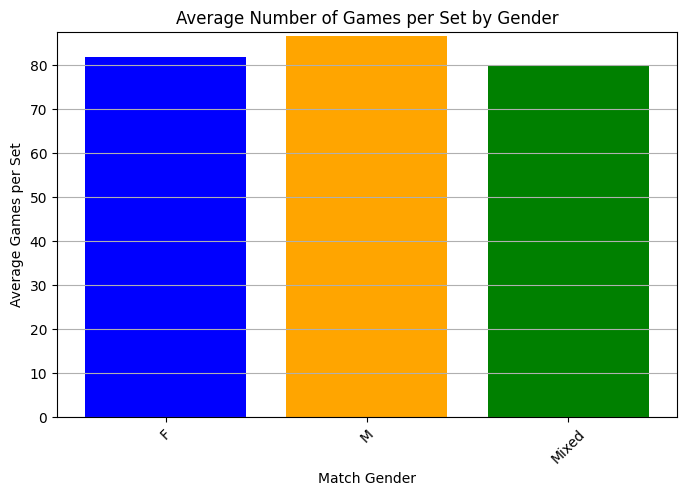

In [28]:
home_gender = MatchHomeTeamInfo[['match_id', 'gender']].rename(columns={'gender': 'home_gender'})  
away_gender = MatchAwayTeamInfo[['match_id', 'gender']].rename(columns={'gender': 'away_gender'})    
gender_info = pd.merge(home_gender, away_gender, on='match_id')  
gender_info['match_gender'] = gender_info.apply(lambda x: 'M' if x['home_gender'] == 'M' and x['away_gender'] == 'M' else ('F' if x['home_gender'] == 'F' and x['away_gender'] == 'F' else 'Mixed'), axis=1)   
games_per_match = GameInfo.groupby('match_id').size().reset_index(name='games_count')  
match_data = pd.merge(gender_info[['match_id', 'match_gender']], games_per_match, on='match_id')  
match_data['sets_count'] = 3   
average_games_per_set = match_data.groupby('match_gender').apply(lambda x: (x['games_count'] / x['sets_count']).mean()).reset_index(name='average_games_per_set')  

print(average_games_per_set)

plt.figure(figsize=(8, 5))  
plt.bar(average_games_per_set['match_gender'], average_games_per_set['average_games_per_set'], color=['blue', 'orange', 'green'])  
plt.title('Average Number of Games per Set by Gender')  
plt.xlabel('Match Gender')  
plt.ylabel('Average Games per Set')  
plt.ylim(0, average_games_per_set['average_games_per_set'].max() + 1)  
plt.xticks(rotation=45)  
plt.grid(axis='y')  



13.What is the distribution of left-handed versus right-handed players?

     handedness  count
0  right-handed  25027
1   left-handed   3596
2  ambidextrous     20


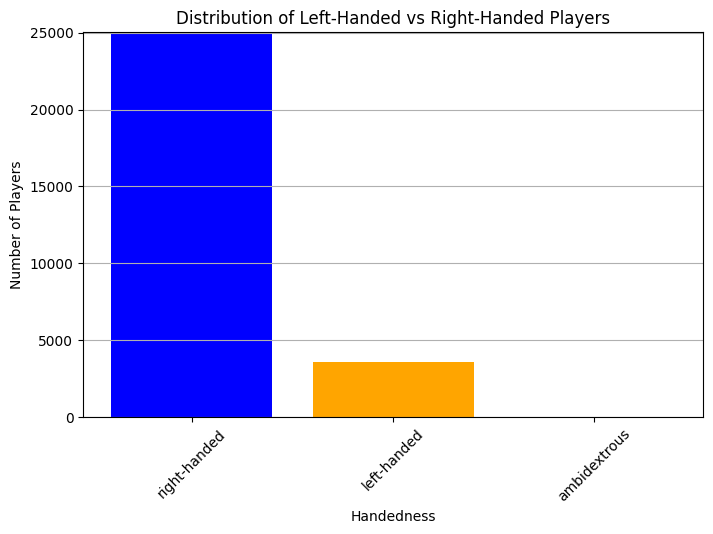

In [26]:
home_handedness = MatchHomeTeamInfo[['match_id', 'plays']].rename(columns={'plays': 'home_handedness'})  
away_handedness = MatchAwayTeamInfo[['match_id', 'plays']].rename(columns={'plays': 'away_handedness'})   
handedness_info = pd.merge(home_handedness, away_handedness, on='match_id', how='outer')  
handedness_melted = handedness_info.melt(id_vars='match_id', value_vars=['home_handedness', 'away_handedness'], value_name='handedness')  
handedness_distribution = handedness_melted['handedness'].value_counts().reset_index()  
handedness_distribution.columns = ['handedness', 'count']  

print(handedness_distribution)

plt.figure(figsize=(8, 5))  
plt.bar(handedness_distribution['handedness'], handedness_distribution['count'], color=['blue', 'orange'])  
plt.title('Distribution of Left-Handed vs Right-Handed Players')  
plt.xlabel('Handedness')  
plt.ylabel('Number of Players')  
plt.xticks(rotation=45)  
plt.ylim(0, handedness_distribution['count'].max() + 1)  
plt.grid(axis='y')  


14.What is the most common type of surface used in tournaments?

        surface_type  count
0           Red clay  14545
1  Hardcourt outdoor   4712
2   Hardcourt indoor    257
3  Synthetic outdoor     94


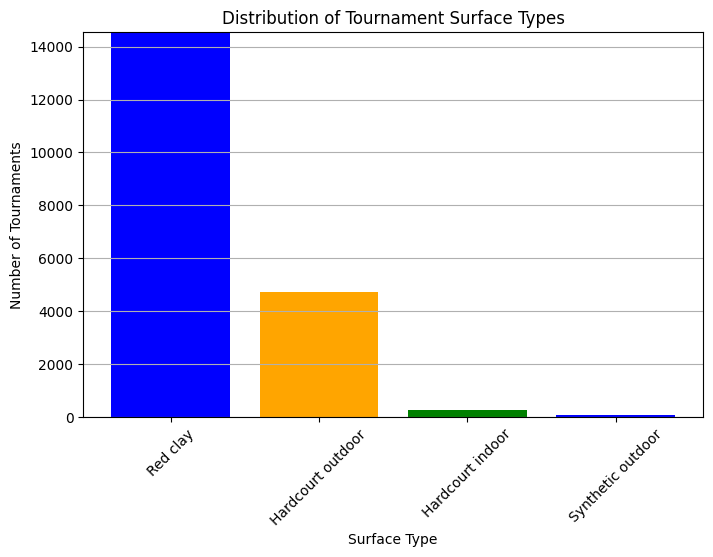

In [34]:
surface_distribution = MatchTournamentInfo['ground_type'].value_counts().reset_index()  
surface_distribution.columns = ['surface_type', 'count']  
print(surface_distribution) 


plt.figure(figsize=(8, 5))  
plt.bar(surface_distribution['surface_type'], surface_distribution['count'], color=['blue', 'orange', 'green'])  
plt.title('Distribution of Tournament Surface Types')  
plt.xlabel('Surface Type')  
plt.ylabel('Number of Tournaments')  
plt.xticks(rotation=45)  
plt.ylim(0, surface_distribution['count'].max() + 1)  
plt.grid(axis='y')

15.How many distinct countries are represented in the dataset?

In [35]:
home_countries = MatchHomeTeamInfo['country']  
away_countries = MatchAwayTeamInfo['country']    
all_countries = pd.concat([home_countries, away_countries])   
distinct_country_count = all_countries.nunique()  

print(f"There are {distinct_country_count} distinct countries represented in the dataset.")

There are 97 distinct countries represented in the dataset.


16.Which player has the highest winning percentage against top 10 ranked opponents?

In [36]:
top_10_home = MatchHomeTeamInfo[MatchHomeTeamInfo['current_rank'] <= 10]
top_10_away = MatchAwayTeamInfo[MatchAwayTeamInfo['current_rank'] <= 10]

matches = pd.merge(MatchEventInfo, MatchHomeTeamInfo[['match_id', 'name']], on='match_id', how='left')
matches = pd.merge(matches, MatchAwayTeamInfo[['match_id', 'name']], on='match_id', how='left', suffixes=('_home', '_away'))

matches['winner'] = matches.apply(lambda row: row['name_home'] if row['winner_code'] == 'home' else row['name_away'], axis=1)
matches['is_top_10_home'] = matches['name_home'].isin(top_10_home['name'])
matches['is_top_10_away'] = matches['name_away'].isin(top_10_away['name'])

top_10_matches = matches[matches['is_top_10_home'] | matches['is_top_10_away']]

results = []

for player in pd.concat([top_10_home['name'], top_10_away['name']]).unique():
    player_matches = top_10_matches[(top_10_matches['name_home'] == player) | (top_10_matches['name_away'] == player)]
    total_matches = len(player_matches)
    wins = sum(player_matches['winner'] == player)
    
    if total_matches > 0:
        winning_percentage = wins / total_matches
    else:
        winning_percentage = 0
    
    results.append({'player': player, 'total_matches': total_matches, 'wins': wins, 'winning_percentage': winning_percentage})

results_df = pd.DataFrame(results)

highest_winning_player = results_df.loc[results_df['winning_percentage'].idxmax()]

print("Player with the highest winning percentage against top 10 ranked opponents:")
print(highest_winning_player)


Player with the highest winning percentage against top 10 ranked opponents:
player                Alcaraz C.
total_matches                 45
wins                          45
winning_percentage           1.0
Name: 16, dtype: object


17.What is the average number of breaks of serve per match?

In [37]:
breaks_of_serve = 0  
match_count = GameInfo['match_id'].nunique()
for match_id in GameInfo['match_id'].unique():  
    match_data = GameInfo[GameInfo['match_id'] == match_id]   
    home_serving = True  
    for index, row in match_data.iterrows():  
        if home_serving and row['away_point'] > row['home_point']:  
            breaks_of_serve += 1  
        elif not home_serving and row['home_point'] > row['away_point']:  
            breaks_of_serve += 1  
        home_serving = not home_serving  

average_breaks_of_serve = breaks_of_serve / match_count if match_count > 0 else 0  

print(f"The average number of breaks of serve per match is {average_breaks_of_serve:.2f}.")

The average number of breaks of serve per match is 84.62.
